In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [140]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [141]:
indicators = data.IndicatorName.unique()

In [142]:
indicators.size

1344

In [156]:
def get_corr(df, country):

    df.dropna()

    country_mask = df["CountryName"] == country
    year_mask1 = df["Year"] > 1992
    year_mask2 = df["Year"] < 2010
    indicator_mask1 = df["IndicatorName"] == "Female legislators, senior officials and managers (% of total)"
    indicator_mask2 = df["IndicatorName"] == "GDP per capita (constant LCU)"

    country_mask.head(50)
    # year_mask1.size
    # year_mask2.size
    df_filtered = df[year_mask1 & year_mask2 & country_mask & (indicator_mask1 | indicator_mask2)]
    piv = df_filtered.pivot(index='Year', columns='IndicatorName', values='Value')
    piv.head(50)
    piv.corr()
    return piv

    

In [165]:
get_corr(data, "Italy").corr()

IndicatorName,"Female legislators, senior officials and managers (% of total)",GDP per capita (constant LCU)
IndicatorName,,
"Female legislators, senior officials and managers (% of total)",1.000000,0.719053
GDP per capita (constant LCU),0.719053,1.000000


In [102]:
countries = data["CountryName"].unique()
for country in countries:
    print(country)
    

Arab World
Caribbean small states
Central Europe and the Baltics
East Asia & Pacific (all income levels)
East Asia & Pacific (developing only)
Euro area
Europe & Central Asia (all income levels)
Europe & Central Asia (developing only)
European Union
Fragile and conflict affected situations
Heavily indebted poor countries (HIPC)
High income
High income: nonOECD
High income: OECD
Latin America & Caribbean (all income levels)
Latin America & Caribbean (developing only)
Least developed countries: UN classification
Low & middle income
Low income
Lower middle income
Middle East & North Africa (all income levels)
Middle East & North Africa (developing only)
Middle income
North America
OECD members
Other small states
Pacific island small states
Small states
South Asia
Sub-Saharan Africa (all income levels)
Sub-Saharan Africa (developing only)
Upper middle income
World
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbai

In [214]:
germany_data = data[data["CountryName"] == "Spain"]

In [215]:
germany_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
19522,Spain,ESP,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,10.056400
19523,Spain,ESP,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,55.132352
19524,Spain,ESP,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,12.695256
19525,Spain,ESP,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,42.437095
19526,Spain,ESP,Alternative and nuclear energy (% of total ene...,EG.USE.COMM.CL.ZS,1960,8.314033


In [216]:
# data["CountryName_Year"] = data["CountryName"] + "_" + data["Year"].to_string()
# data.set_index()
# data.head()
# germany_reduced = germany_data[germany_data["IndicatorName"] == "Female legislators, senior officials and managers (% of total)"]
# germany_reduced = germany_reduced[germany_reduced["IndicatorName"] == ""]
pivot = pd.pivot_table(data, index=['Year', 'CountryName'], columns='IndicatorName', values='Value', aggfunc='mean')
indicator1 = "Birth rate, crude (per 1,000 people)"
indicator2 = "Urban population (% of total)"
pivot = pivot[[indicator1, indicator2]]

In [217]:
# pivot.dropna()
# pivot.head(-10)
# pivot.corr()

IndicatorName              Birth rate, crude (per 1,000 people)  \
Year CountryName                                                  
1960 Afghanistan                                         51.276   
     Albania                                             42.240   
     Algeria                                             49.671   
     American Samoa                                         NaN   
     Andorra                                                NaN   
...                                                         ...   
2015 United Arab Emirates                                   NaN   
     United Kingdom                                         NaN   
     United States                                          NaN   
     Upper middle income                                    NaN   
     Uruguay                                                NaN   

IndicatorName              Urban population (% of total)  
Year CountryName                                          
1960 Afghanistan                                   8.221  
     Albania                                      30.705  
     Algeria                                      30.510  
     American Samoa                               66.211  
     Andorra                                      58.450  
...                                                  ...  
2015 United Arab Emirates                            NaN  
     United Kingdom                                  NaN  
     United States                                   NaN  
     Upper middle income                             NaN  
     Uruguay                                         NaN  

[13821 rows x 2 columns]

In [218]:
filter1 = germany_data["IndicatorName"] == indicator1
filter2 = germany_data["IndicatorName"] == indicator2

germany_reduced = germany_data[ filter1 | filter2]
germany_pivot = germany_reduced.pivot(index='Year', columns='IndicatorName', values='Value')
germany_pivot.head()
germany_pivot.corr()

IndicatorName,"Birth rate, crude (per 1,000 people)",Urban population (% of total)
IndicatorName,,
"Birth rate, crude (per 1,000 people)",1.000000,-0.930242
Urban population (% of total),-0.930242,1.000000


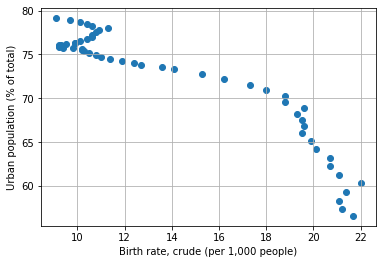

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
# axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(indicator1,fontsize=10)
axis.set_ylabel(indicator2,fontsize=10)

X = germany_pivot[indicator1]
Y = germany_pivot[indicator2]

axis.scatter(X, Y)

In [120]:
pivot.to_excel("pivot.xlsx")

In [40]:
pivot.corr()

IndicatorName,"2005 PPP conversion factor, GDP (LCU per international $)","2005 PPP conversion factor, private consumption (LCU per international $)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",Access to non-solid fuel (% of population),"Access to non-solid fuel, rural (% of rural population)","Access to non-solid fuel, urban (% of urban population)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)",...,Urban population (% of total),Urban population growth (annual %),"Vulnerable employment, female (% of female employment)","Vulnerable employment, male (% of male employment)","Vulnerable employment, total (% of total employment)","Wage and salaried workers, female (% of females employed)","Wage and salaried workers, total (% of total employed)","Wage and salary workers, male (% of males employed)","Water productivity, total (constant 2005 US$ GDP per cubic meter of total freshwater withdrawal)",Wholesale price index (2010 = 100)
IndicatorName,,,,,,,,,,,,,,,,,,,,,
"2005 PPP conversion factor, GDP (LCU per international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2005 PPP conversion factor, private consumption (LCU per international $)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Access to electricity, rural (% of rural population)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Access to electricity, urban (% of urban population)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wage and salaried workers, female (% of females employed)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008454,-0.193241,...,0.458991,0.239842,-0.997396,0.205088,-0.678572,1.000000,0.683175,-0.279657,-0.454551,-0.339990
"Wage and salaried workers, total (% of total employed)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003914,-0.151878,...,0.034443,0.530543,-0.658346,-0.549000,-0.971093,0.683175,1.000000,0.507293,-0.682589,-0.631503
"Wage and salary workers, male (% of males employed)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039696,-0.235764,...,-0.548925,0.405166,0.307358,-0.974185,-0.486531,-0.279657,0.507293,1.000000,-0.932652,-0.714925
